In [3]:
import pandas as pd

m6a = pd.read_csv("m6a_cov10_with_5mer.bed", sep="\t", low_memory=False)

glori = pd.read_csv("/prj/Qingyang/GLORI.chrALL.tsv", sep="\t", low_memory=False)

In [4]:
merged = pd.merge(m6a, glori, on=["chrom", "chromStart", "chromEnd", "strand"], how="inner", suffixes=("_m6a", "_glori"))

merged["5mer_match"] = merged["5mer"] == merged["ref5mer"]

mismatch = merged[~merged["5mer_match"]]
mismatch.to_csv("5mer_mismatch.tsv", sep="\t", index=False)

matched = merged[merged["5mer_match"]].copy()
matched_output = matched[["chrom", "chromStart", "chromEnd", "strand", "5mer", "score_glori", "frequency"]]
matched_output.columns = ["chrom", "chromStart", "chromEnd", "strand", "5mer", "GLORI_score", "m6a_frequency"]

matched_output.to_csv("matched_GLORIm6a.tsv", sep="\t", index=False)

In [5]:
df = pd.read_csv("matched_GLORIm6a.tsv", sep="\t", low_memory=False)

In [6]:
print(df.head())

  chrom  chromStart  chromEnd strand   5mer  GLORI_score  m6a_frequency
0     1      185037    185038      -  GGACT         69.3          61.11
1     1      185232    185233      -  GGACG         34.4          12.09
2     1      826938    826939      -  TGACT         65.8          57.14
3     1      841506    841507      +  AGACT         73.7          92.31
4     1      841558    841559      +  GAACT         74.5          91.67


In [7]:
print(df.shape)

(130678, 7)


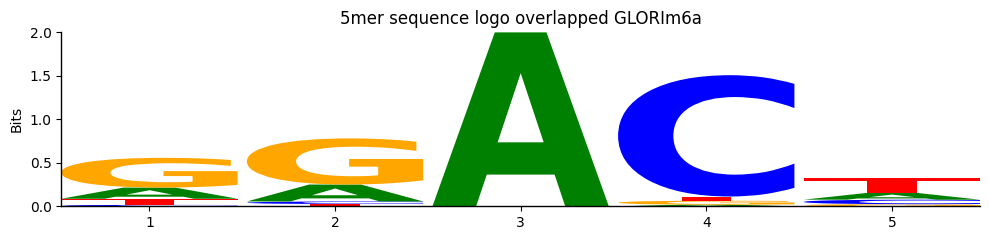

In [8]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

five_mers = df['5mer'].dropna().tolist()

info_matrix = logomaker.alignment_to_matrix(sequences=five_mers, to_type='information')

logo = logomaker.Logo(info_matrix, color_scheme='classic')

logo.ax.set_ylabel("Bits")
logo.ax.set_ylim([0, 2])

logo.ax.set_xticks([0, 1, 2, 3, 4])
logo.ax.set_xticklabels(['1', '2', '3', '4', '5'])

logo.style_spines(visible=False)
logo.style_spines(spines=["left", "bottom"], visible=True)

plt.title("5mer sequence logo overlapped GLORIm6a")
plt.tight_layout()
plt.show()

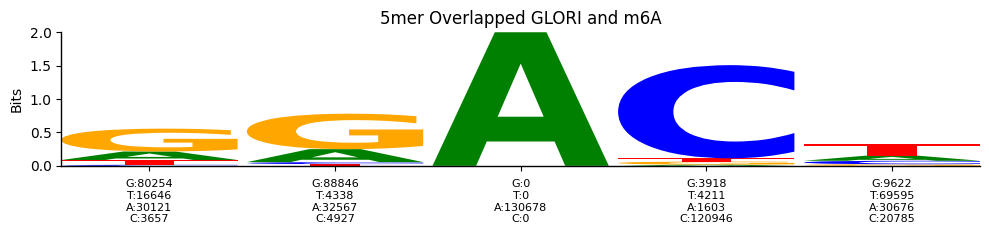

In [9]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
import numpy as np

five_mers = df['5mer'].dropna().tolist()

info_matrix = logomaker.alignment_to_matrix(sequences=five_mers, to_type='information')

logo = logomaker.Logo(info_matrix, color_scheme='classic')

logo.ax.set_ylabel("Bits")
logo.ax.set_ylim([0, 2])

logo.ax.set_xticks([0, 1, 2, 3, 4])
logo.ax.set_xticklabels(['1', '2', '3', '4', '5'])
logo.ax.set_xticklabels([])

logo.style_spines(visible=False)
logo.style_spines(spines=["left", "bottom"], visible=True)

counts_matrix = logomaker.alignment_to_matrix(sequences=five_mers, to_type='counts')

for pos in range(5):
    g_count = counts_matrix.loc[pos, 'G'] if 'G' in counts_matrix.columns else 0
    t_count = counts_matrix.loc[pos, 'T'] if 'T' in counts_matrix.columns else 0
    a_count = counts_matrix.loc[pos, 'A'] if 'A' in counts_matrix.columns else 0
    c_count = counts_matrix.loc[pos, 'C'] if 'C' in counts_matrix.columns else 0
    text = f"G:{g_count}\nT:{t_count}\nA:{a_count}\nC:{c_count}"
    logo.ax.text(pos, -0.2, text, ha='center', va='top', fontsize=8, transform=logo.ax.transData)

plt.title("5mer Overlapped GLORI and m6A")

plt.tight_layout()
plt.show()